# Preparing the data and visualize it

In [ ]:
# Labelling the images inside the folders


import os

path = os.chdir("C:\\Users\\User\\Downloads\\Compressed\\Student-engagement-dataset\\frustrated")

counter = 1
for file in os.listdir(path):
  new_file_name = "frustrated " "{}.jpg".format(counter)
  os.rename(file, new_file_name)

  counter += 1

In [ ]:
# Install the Split - folder package

%pip install split-folders

In [ ]:
# Import the package

import splitfolders

splitfolders.ratio("C:\\Users\\User\\Downloads\\Compressed\\Student-engagement-dataset", # The location of dataset
                   output="C:\\Users\\User\\Downloads\\dataset", # The output location
                   seed=42, # The number of seed
                   ratio=(.7, .2, .1), # ration of split is 70%, 20%, 10%
                   group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
                   move=False # I choose not to move, so I turn this into False
                   )

In [ ]:
import seaborn as sns
import pandas as pd
import cv2
import os
import numpy as np

In [ ]:


labels = ['frustrated', 'confused', 'looking away', 'drowsy', 'bored', 'engaged']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
# Now we can easily fetch our data.

dataset = get_data("C:\\Users\\User\\Downloads\\Compressed\\Student-engagement-dataset")

C:\Users\User\AppData\Local\Temp\ipykernel_25116\3624338061.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

  return np.array(data)


In [ ]:
# plotting the unbalance dataset

data = []
for i in dataset:
    if(i[1] == 0):
        data.append("frustrated")
    if(i[1] == 1):
        data.append("confused")
    if(i[1] == 2):
        data.append("looking away")
    if(i[1] == 3):
        data.append("drowsy")
    if(i[1] == 4):
        data.append("bored")
    if(i[1] == 5):
        data.append("engaged")
sns.set_style('darkgrid')
# sns.countplot(l)

In [ ]:
# putting l in a dataframe

df_data = pd.DataFrame(data)

<AxesSubplot: xlabel='0'>

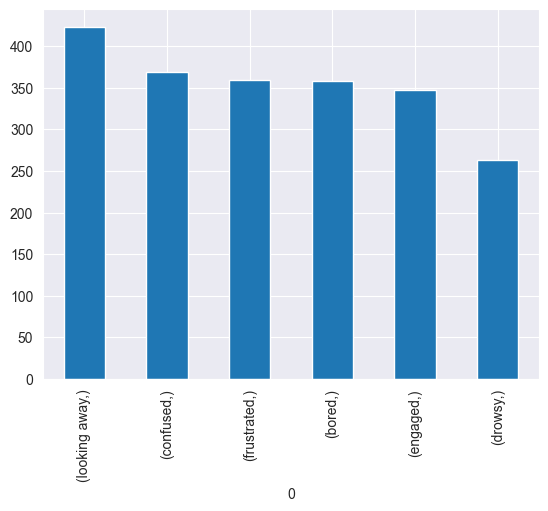

In [ ]:
# Displaying the data inside the dataframe in a plot bar

df_data.value_counts().plot(kind='bar')

# Creating our model

In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [7]:
!pip install keras
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.83.0 which is incompatible.
tfx-bsl 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow-transform 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
apache-beam 2.44.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.


In [9]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.backend import image_data_format

# Define data paths
train_dir = '/kaggle/input/dataset/dataset/train'
test_dir = '/kaggle/input/dataset/dataset/test'
val_dir = '/kaggle/input/dataset/dataset/val'

# Define image dimensions
img_width, img_height = 224, 224

# Define batch size
batch_size = 32

# Define data generator for train set
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False,
)

# Define data generator for validation set
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

val = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False,
)

# Define data generator for test set
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False,
)

# Get number of classes
num_classes = len(train.class_indices)

# Print class indices
print(train.class_indices)

# Print number of samples
print('Number of training samples:', train.n)
print('Number of validation samples:', val.n)
print('Number of test samples:', test.n)


Found 1481 images belonging to 6 classes.
Found 421 images belonging to 6 classes.
Found 218 images belonging to 6 classes.
{'bored': 0, 'confused': 1, 'drowsy': 2, 'engaged': 3, 'frustrated': 4, 'looking away': 5}
Number of training samples: 1481
Number of validation samples: 421
Number of test samples: 218


TypeError: unhashable type: 'numpy.ndarray'

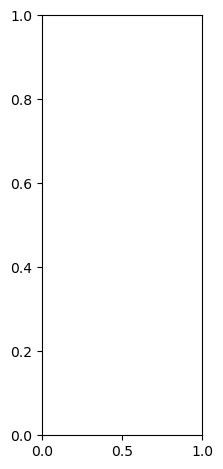

In [10]:
# Let’s take a look at some of the train set images that we obtained from the Data Augmentation
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'bored', 1:'confused', 2:'drowsy', 3:'engaged', 4:'frustrated', 5:'looking away'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='brg',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

In [11]:
# Necessary imports

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.layers import Dropout

In [12]:
# Define the model architecture
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(128, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(256, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(512, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(6, activation='softmax'))

# Compile the model
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

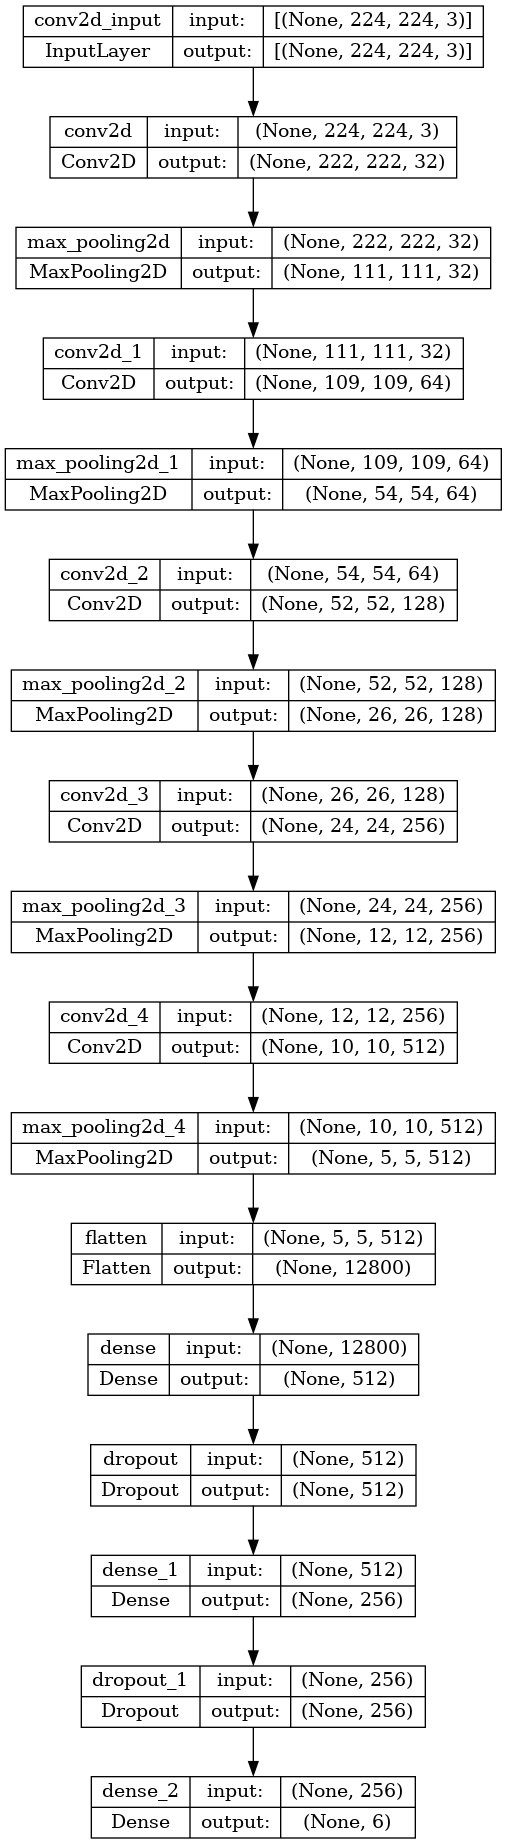

In [14]:
# Visualize CNN model

from keras.utils import plot_model
plot_model(cnn,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [25]:
# Defining Callback list

early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [24]:
# Assigning Class Weights

from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight(class_weight='balanced', classes=np.unique(train.classes), y=train.classes)
cw = dict(zip( np.unique(train.classes), weights))
print(cw)

{0: 0.9873333333333333, 1: 0.9567183462532299, 2: 1.3414855072463767, 3: 1.0199724517906337, 4: 0.9833997343957503, 5: 0.8338963963963963}


In [35]:
# Training

history = cnn.fit(train,epochs=25, validation_data=val, class_weight=cw, callbacks=callbacks_list)

Epoch 1/25
47/47 [==============================] - 20s 423ms/step - loss: 0.1182 - accuracy: 0.9568 - val_loss: 0.0975 - val_accuracy: 0.9525 - lr: 9.0000e-05
Epoch 2/25
47/47 [==============================] - 18s 394ms/step - loss: 0.1179 - accuracy: 0.9521 - val_loss: 0.0965 - val_accuracy: 0.9525 - lr: 9.0000e-05
Epoch 3/25
47/47 [==============================] - 18s 375ms/step - loss: 0.1097 - accuracy: 0.9527 - val_loss: 0.0967 - val_accuracy: 0.9501 - lr: 9.0000e-05
Epoch 4/25
47/47 [==============================] - 19s 392ms/step - loss: 0.1172 - accuracy: 0.9541 - val_loss: 0.0959 - val_accuracy: 0.9525 - lr: 9.0000e-05
Epoch 5/25
47/47 [==============================] - 19s 395ms/step - loss: 0.1133 - accuracy: 0.9554 - val_loss: 0.0964 - val_accuracy: 0.9525 - lr: 9.0000e-05
Epoch 6/25
47/47 [==============================] - ETA: 0s - loss: 0.1184 - accuracy: 0.9554
Epoch 6: ReduceLROnPlateau reducing learning rate to 2.700000040931627e-05.
47/47 [=======================

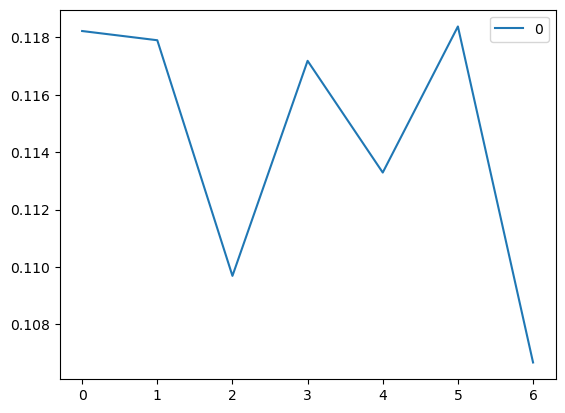

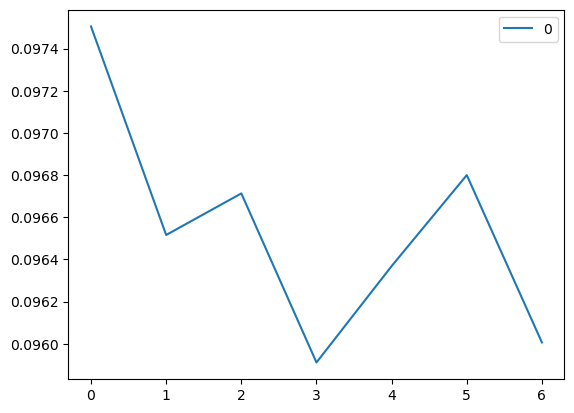

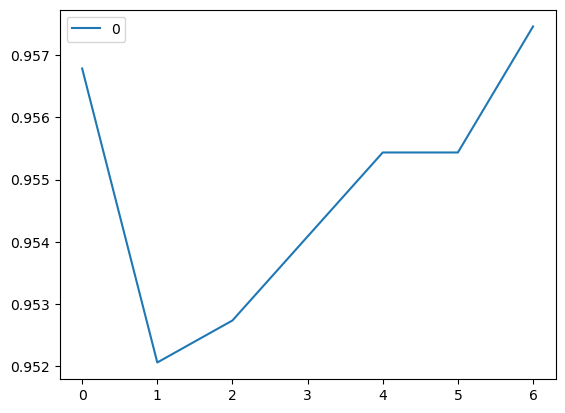

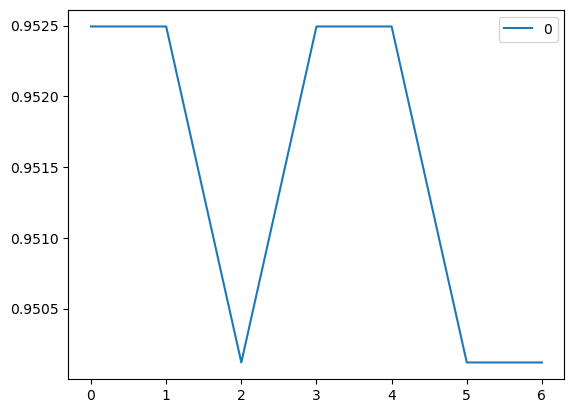

In [36]:
# Evaluate
import pandas as pd
import matplotlib.pyplot as plt

# Plot the training and validation loss
pd.DataFrame(history.history['loss']).plot()
pd.DataFrame(history.history['val_loss']).plot()

# Plot the training and validation accuracy
pd.DataFrame(history.history['accuracy']).plot()
pd.DataFrame(history.history['val_accuracy']).plot()

plt.show()

In [37]:
# Accuracy on test data

test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

7/7 [==============================] - 2s 293ms/step - loss: 0.1080 - accuracy: 0.9450
The testing accuracy is : 94.49541568756104 %


In [38]:
# Predict the test data

preds = cnn.predict(test,verbose=1)

7/7 [==============================] - 2s 281ms/step


In [20]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1